In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train_df = pd.read_csv('../input/train.csv', parse_dates=['date'])
test_df = pd.read_csv('../input/test.csv', parse_dates=['date'])

In [3]:
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
test_df.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [5]:
combine = [train_df,test_df]

In [6]:
for dataset in combine:
    dataset['year'] = dataset['date'].dt.year
    dataset['day_of_week'] = dataset['date'].dt.dayofweek
    dataset['week_of_year'] = dataset['date'].dt.weekofyear
    dataset['month'] = dataset['date'].dt.month
    dataset['date in month'] = dataset['date'].dt.day
    
train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month
0,2013-01-01,1,1,13,2013,1,1,1,1
1,2013-01-02,1,1,11,2013,2,1,1,2
2,2013-01-03,1,1,14,2013,3,1,1,3
3,2013-01-04,1,1,13,2013,4,1,1,4
4,2013-01-05,1,1,10,2013,5,1,1,5


In [7]:
# Let's see if the average sales at the stores will matter, i think it is pretty obvious it will lol
dict_of_avg_sales_at_stores = {}

for i in range(1,11):
    dict_of_avg_sales_at_stores[i] = train_df[train_df['store'] == i]['sales'].sum()/91300
    
def find_avg_sales_at_stores(store):
    return dict_of_avg_sales_at_stores[store]

for dataset in combine:
    dataset['avg_sales_at_store'] = dataset['store'].map(find_avg_sales_at_stores)


In [8]:
# Let's see if the average sale of each item at each store matters
dict_of_avg_sales_itemstore = {}
for i in range(1,11):
    df_of_stores = train_df[train_df['store'] == i]
    for j in range(1,51):
        df_of_items_at_store = df_of_stores[df_of_stores['item'] == j]
        dict_of_avg_sales_itemstore[(i,j)] = (df_of_items_at_store['sales'].sum())/(len(df_of_items_at_store))
        
list_of_salesitemstore = []
list_of_stores = train_df['store'].tolist()
list_of_item = train_df['item'].tolist()
    
for i in range(0,len(list_of_stores)):
    list_of_salesitemstore.append(dict_of_avg_sales_itemstore[(list_of_stores[i],list_of_item[i])])
    
salesatstore = []
stores = test_df['store'].tolist()
items = test_df['item'].tolist()

for i in range(0,len(stores)):
    salesatstore.append(dict_of_avg_sales_itemstore[(stores[i]),items[i]])
    
train_df['avg_sales_of_item_at_store'] = list_of_salesitemstore
test_df['avg_sales_of_item_at_store'] = salesatstore

In [9]:
# Let's take a look at the average sales of each item
dict_of_item_sales_avgs = {}
for i in range(1,51):
    dict_of_item_sales_avgs[i] = train_df[train_df['item'] == i]['sales'].sum()/18260
    
def avg_item_sales(item):
    return dict_of_item_sales_avgs[item]

for dataset in combine:
    dataset['avg_sales_of_item'] = dataset['item'].map(avg_item_sales)

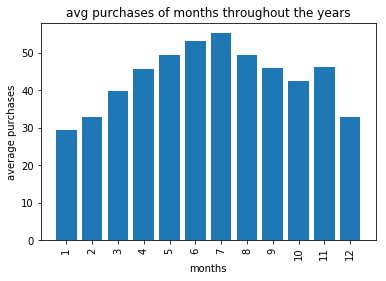

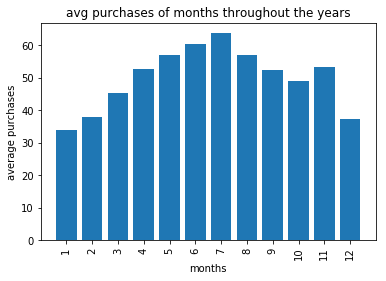

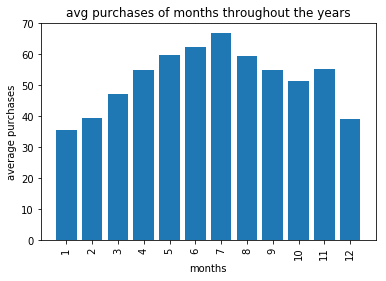

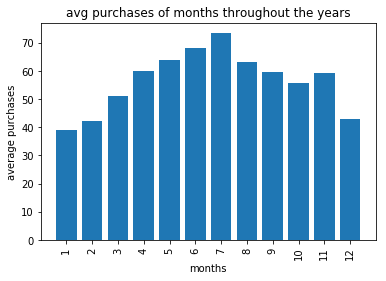

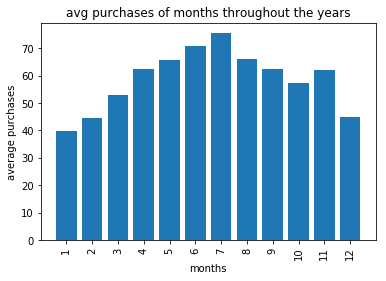

In [10]:
#Lets look at the sales of each month for each year
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(2013,2018):
    df_to_graph = train_df[train_df['year']==i]
    
    months = []
    sales_per_months = []
    
    for i in range(1,13):
        months.append(i)
        sales_per_months.append(sum(df_to_graph[df_to_graph['month']==i]['sales'].tolist())/len(df_to_graph[df_to_graph['month']==i]['sales'].tolist()))
    
    plt.bar(months,sales_per_months)
    plt.xticks(months,rotation=90)
    plt.xlabel('months')
    plt.ylabel('average purchases')
    plt.title('avg purchases of months throughout the years')
    plt.show()

In [11]:
#There appear to be more sales within months 5,6,7, or 8
#Lets add some features to indicate if it is one of those months 

def is_month_5(month):
    if month == 5:
        return 1
    else:
        return 0
    
def is_month_6(month):
    if month == 6:
        return 1
    else:
        return 0
    
def is_month_7(month):
    if month == 7:
        return 1
    else:
        return 0
    
def is_month_8(month):
    if month==8:
        return 1
    else:
        return 0
    
for dataset in combine:
    dataset['is month 5'] = dataset['month'].map(is_month_5)
    dataset['is month 6'] = dataset['month'].map(is_month_6)
    dataset['is month 7'] = dataset['month'].map(is_month_7)
    dataset['is month 8'] = dataset['month'].map(is_month_8)
    
train_df.head(8)

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0
5,2013-01-06,1,1,12,2013,6,1,1,6,47.268379,19.971522,21.981599,0,0,0,0
6,2013-01-07,1,1,10,2013,0,2,1,7,47.268379,19.971522,21.981599,0,0,0,0
7,2013-01-08,1,1,9,2013,1,2,1,8,47.268379,19.971522,21.981599,0,0,0,0


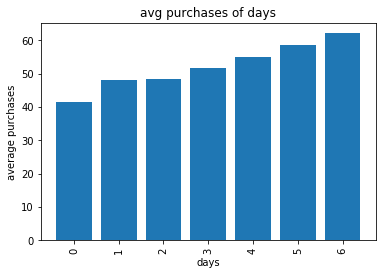

In [12]:
#Lets graph the average sales of each day 
days = []
avg_sales_per_day = []

for i in range(0,7):
    days.append(i)
    avg_sales_per_day.append(sum(train_df[train_df['day_of_week']==i]['sales'].tolist())/len(train_df[train_df['day_of_week']==i]['sales'].tolist()))
    
plt.bar(days,avg_sales_per_day)
plt.xticks(days,rotation=90)
plt.xlabel('days')
plt.ylabel('average purchases')
plt.title('avg purchases of days')
plt.show()

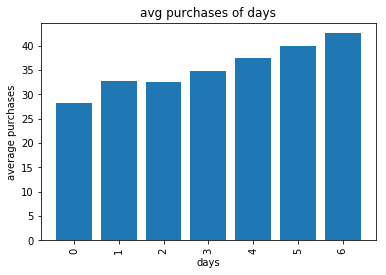

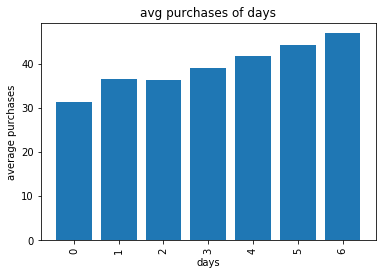

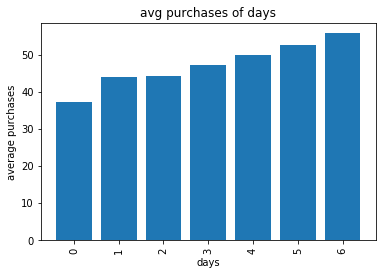

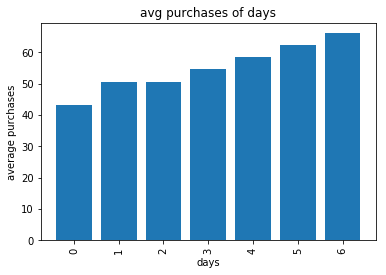

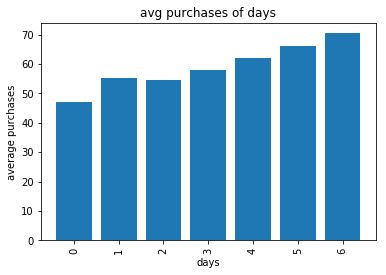

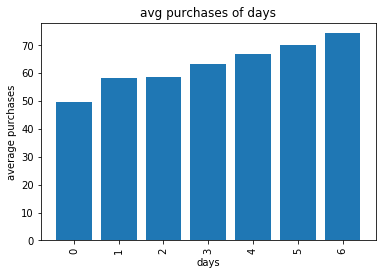

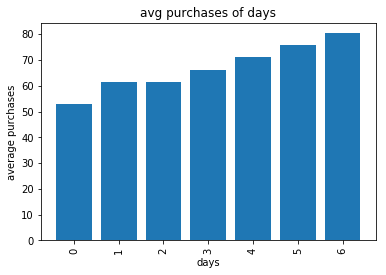

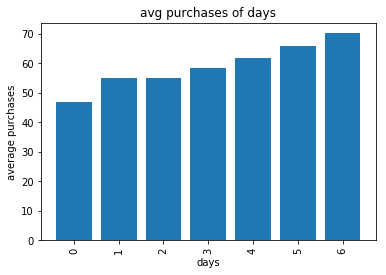

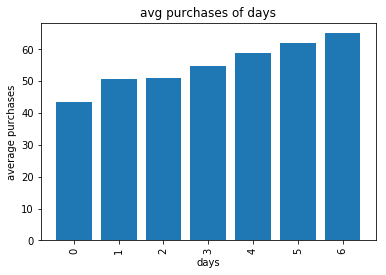

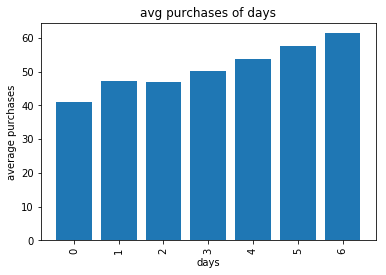

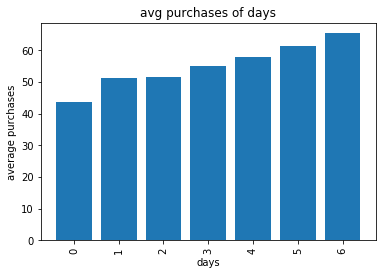

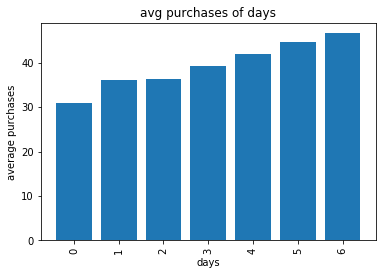

In [13]:
# I do have a hunch that more products are bought on weekends as opposed to other days, lets explore this further, to confirm
# Lets look at the sales for each day during each month

for i in range(1,13):
    df_to_graph = train_df[train_df['month']==i]
    days = []
    avg_sales_per_day = []

    for i in range(0,7):
        days.append(i)
        avg_sales_per_day.append(sum(df_to_graph[df_to_graph['day_of_week']==i]['sales'].tolist())/len(df_to_graph[df_to_graph['day_of_week']==i]['sales'].tolist()))
    
    plt.bar(days,avg_sales_per_day)
    plt.xticks(days,rotation=90)
    plt.xlabel('days')
    plt.ylabel('average purchases')
    plt.title('avg purchases of days')
    plt.show()

In [14]:
# I think now it is safe to assume that peoeple will generrally spend more on weekends 
def is_weekend(day):
    if day==5:
        return 1
    elif day==6:
        return 1
    else:
        return 0
    
for dataset in combine:
    dataset['is weekend'] = dataset['day_of_week'].map(is_weekend)
    
train_df.head()


,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1


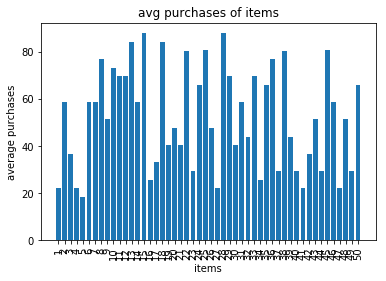

In [15]:
# Lets look at some of the data on the products themselves 
items = train_df.item.unique()
avg_item_sales = []

for i in range(0,len(items)):
    avg_item_sales.append(sum(train_df[train_df['item']==items[i]]['sales'].tolist())/len(train_df[train_df['item']==items[i]]['sales'].tolist()))
    
plt.bar(items,avg_item_sales)
plt.xticks(items,rotation=90)
plt.xlabel('items')
plt.ylabel('average purchases')
plt.title('avg purchases of items')
plt.show()

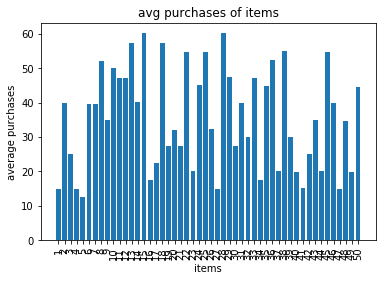

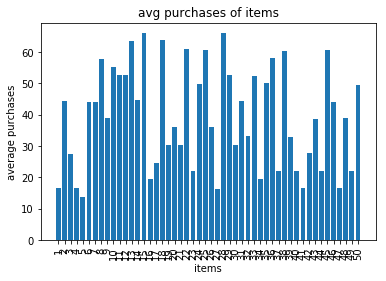

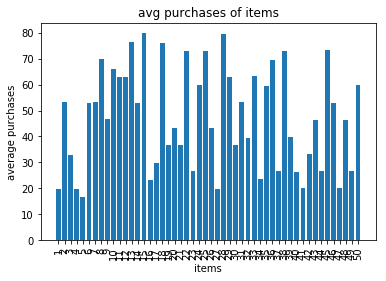

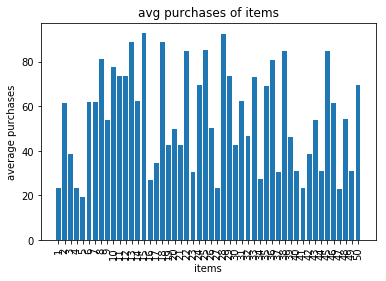

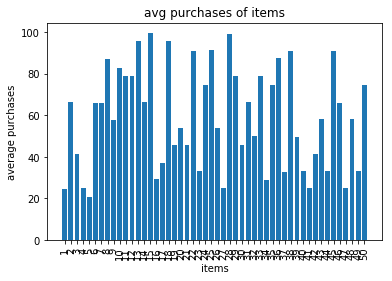

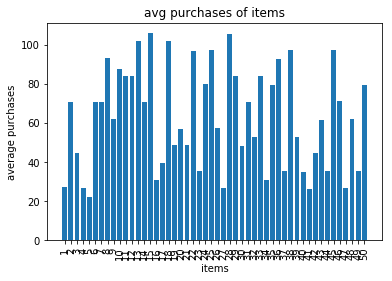

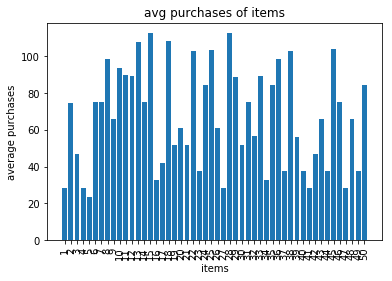

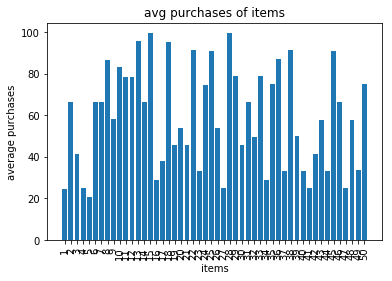

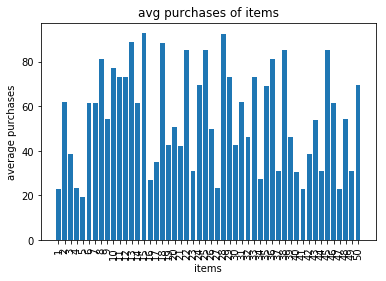

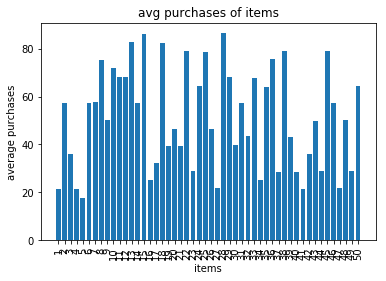

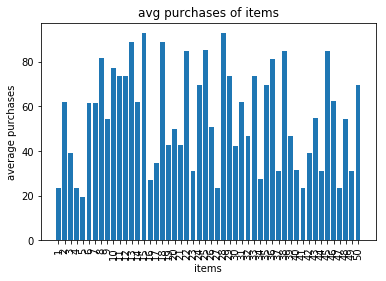

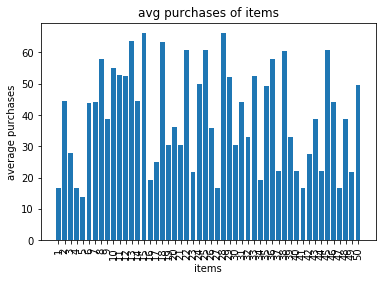

In [16]:
#Lets take a look at the item sales data for each month

for i in range(1,13):
    month_df = train_df[train_df['month']==i]
    
    avg_item_sales = []

    for i in range(0,len(items)):
        avg_item_sales.append(sum(month_df[month_df['item']==items[i]]['sales'].tolist())/len(month_df[month_df['item']==items[i]]['sales'].tolist()))
    
    plt.bar(items,avg_item_sales)
    plt.xticks(items,rotation=90)
    plt.xlabel('items')
    plt.ylabel('average purchases')
    plt.title('avg purchases of items')
    plt.show()

In [17]:
#Lets make a feature to determine whether or not an item is one of the top ten most sold
#Also look at the date in month, because sometimes people spend more at the beginning of a month
from heapq import nlargest
avg_item_sales = []

for i in range(0,len(items)):
    avg_item_sales.append(sum(train_df[train_df['item']==items[i]]['sales'].tolist())/len(train_df[train_df['item']==items[i]]['sales'].tolist()))
    
top_ten_stores = []
top_ten_stores_sales = nlargest(10, avg_item_sales)

for i in range(0,len(top_ten_stores_sales)):
    top_ten_stores.append(avg_item_sales.index(top_ten_stores_sales[i]))

In [18]:
def islargest(store):
    if store==top_ten_stores[0]:
        return 1
    else:
        return 0
    
def issecondlargest(store):
    if store==top_ten_stores[1]:
        return 1
    else:
        return 0
    
def isthirdlargest(store):
    if store==top_ten_stores[2]:
        return 1
    else:
        return 0
    
def isfourthlargest(store):
    if store==top_ten_stores[3]:
        return 1
    else:
        return 0
    
def isfifthlargest(store):
    if store==top_ten_stores[4]:
        return 1
    else:
        return 0
    
def issixthlargest(store):
    if store==top_ten_stores[5]:
        return 1
    else:
        return 0
    
def isseventh(store):
    if store==top_ten_stores[6]:
        return 1
    else:
        return 0
    
def iseighth(store):
    if store == top_ten_stores[7]:
        return 1
    else:
        return 0
    
def isninth(store):
    if store==top_ten_stores[8]:
        return 1
    else:
        return 0
    
def istenth(store):
    if store==top_ten_stores[9]:
        return 1
    else:
        return 0

In [19]:
for dataset in combine:
    dataset['largest'] = dataset['store'].map(islargest)
    dataset['second'] = dataset['store'].map(issecondlargest)
    dataset['third'] = dataset['store'].map(isthirdlargest)
    dataset['fourth'] = dataset['store'].map(isfourthlargest)
    dataset['fifth'] = dataset['store'].map(isfifthlargest)
    dataset['sixth'] = dataset['store'].map(issixthlargest)
    dataset['seventh'] = dataset['store'].map(isseventh)
    dataset['eighth'] = dataset['store'].map(iseighth)
    dataset['ninth'] = dataset['store'].map(isninth)
    dataset['tenth'] = dataset['store'].map(istenth)    
    
train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


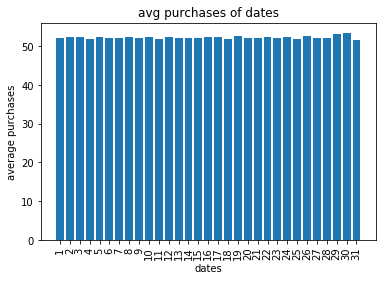

In [20]:
#Now lets take a look at date in month
#Lets see if we can confirm my hyptothesis that people will spend more at the beginning of the month as opposed to the end

dates = train_df['date in month'].unique()
avg_sales_per_date = []

for i in range(1,32):
    avg_sales_per_date.append(sum(train_df[train_df['date in month']==i]['sales'].tolist())/len(train_df[train_df['date in month']==i]['sales'].tolist()))
    
plt.bar(dates,avg_sales_per_date)
plt.xticks(dates,rotation=90)
plt.xlabel('dates')
plt.ylabel('average purchases')
plt.title('avg purchases of dates')
plt.show()

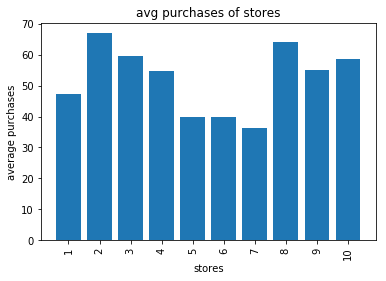

In [21]:
#It appears as though my hypothesis is incorrect
#Now lets take a look at the sales of specific shops

stores = train_df['store'].unique()
avg_store_sales = []

for i in range(0,len(stores)):
    avg_store_sales.append(sum(train_df[train_df['store']==stores[i]]['sales'].tolist())/len(train_df[train_df['store']==stores[i]]['sales'].tolist()))
    
plt.bar(stores,avg_store_sales)
plt.xticks(stores,rotation=90)
plt.xlabel('stores')
plt.ylabel('average purchases')
plt.title('avg purchases of stores')
plt.show()

In [22]:
#Lets add the features for average slaes for month, day of week, week of year
#We could also start looking at avg sales for store and item during month week and and day of week
#also get rid of date in month

dict1 = {}

for i in range(1,13):
    month_sales = train_df[train_df['month']==i]['sales'].tolist()
    dict1[i] = sum(month_sales)/len(month_sales)
    
def avg_month_sales(month):
    return dict1[month]

dict2 = {}

for i in range(0,7):
    weekday_sales = train_df[train_df['day_of_week']==i]['sales'].tolist()
    dict2[i] = sum(weekday_sales)/len(weekday_sales)
    
def avg_weekday_sales(weekday):
    return dict2[weekday]

for dataset in combine:
    dataset['avg month sales'] = dataset['month'].map(avg_month_sales)
    dataset['avg weekday sales'] = dataset['day_of_week'].map(avg_weekday_sales)
    
train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697


In [23]:
train_df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
# lets add avg week of year sales
dict3 = {}

for i in range(1,54):
    week_sales = train_df[train_df['week_of_year']==i]['sales'].tolist()
    dict3[i] = sum(week_sales)/len(week_sales)
    
def weekofyear_sales(week):
    return dict3[week]

for dataset in combine:
    dataset['avg week of year sales'] = dataset['week_of_year'].map(weekofyear_sales)
    
train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588


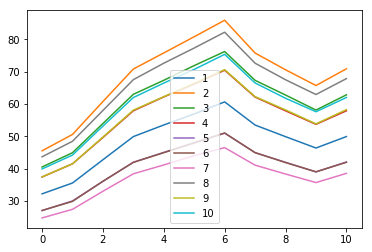

In [25]:
#Lets look at the average sales of stores per month 

df_of_store_sales = pd.DataFrame()

for i in range(1,11):
    list_of_sales = []
    store_df = train_df[train_df['store']==i]
    for j in range(1,12):
        month_sales = store_df[store_df['month']==j]['sales'].tolist()
        list_of_sales.append(sum(month_sales)/len(month_sales))
    df_of_store_sales[i] = list_of_sales
    
df_of_store_sales.plot(kind='line')

In [26]:
#Clearly different stores are having different average sales at different months lets add this as a feature to our dataset

dict_of_monthly_store_sales = {}

for i in range(1,11):
    list_of_sales = []
    store_df = train_df[train_df['store']==i]
    for j in range(1,13):
        month_sales = store_df[store_df['month']==j]['sales'].tolist()
        dict_of_monthly_store_sales[(i,j)]=(sum(month_sales)/len(month_sales))
    
stores = train_df['store'].tolist()
months = train_df['month'].tolist()

monthly_store_sales = []

for i in range(0,len(stores)):
    monthly_store_sales.append(dict_of_monthly_store_sales[(stores[i],months[i])])
    
train_df['avg sales of stores per month'] = monthly_store_sales

train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452


In [27]:
#Lets add this feature to our test dataset
stores = test_df['store'].tolist()
months = test_df['month'].tolist()

avg_monthly_store_sales = []

for i in range(0,len(stores)):
    avg_monthly_store_sales.append(dict_of_monthly_store_sales[stores[i],months[i]])
    
test_df['avg sales of stores per month'] = avg_monthly_store_sales

test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452


In [28]:
#So it seems that store 2 has the highest sales
#It seems store 7 has the lowest sales 
#Lets add features to indicate this

def isstore2(store):
    if store==2:
        return 1
    else:
        return 0
    
def isstore7(store):
    if store==7:
        return 1
    else:
        return 0

combine = [train_df,test_df]

for dataset in combine:
    dataset['is store 2'] = dataset['store'].map(isstore2)
    dataset['is store 7'] = dataset['store'].map(isstore7)
    
train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0


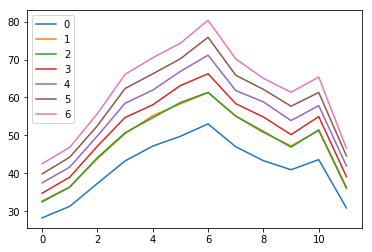

In [29]:
#Lets look at avg sales per day per month
df_of_day_sales = pd.DataFrame()

for i in range(0,7):
    list_of_sales = []
    day_df = train_df[train_df['day_of_week']==i]
    for j in range(1,13):
        month_sales = day_df[day_df['month']==j]['sales'].tolist()
        list_of_sales.append(sum(month_sales)/len(month_sales))
    df_of_day_sales[i] = list_of_sales
    
df_of_day_sales.plot(kind='line')

In [30]:
#I think day of the week togeather with month is an important feature
#Lets add a mapping for day of the week togeather with the month

day_and_month = {}

days = train_df['day_of_week'].tolist()
months = train_df['month'].tolist()
daymonthpair = []

for i in range(0,len(days)):
    if (days[i],months[i]) in day_and_month:
        daymonthpair.append(day_and_month[(days[i],months[i])])
    else:
        day_and_month[(days[i],months[i])] = len(day_and_month)+1
        daymonthpair.append(day_and_month[(days[i],months[i])])
        
train_df['day and month'] = daymonthpair
train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5


In [31]:
#lets add this same feature for our test set

days = test_df['day_of_week'].tolist()
months = test_df['month'].tolist()
daymonthpair = []

for i in range(0,len(days)):
    if (days[i],months[i]) in day_and_month:
        daymonthpair.append(day_and_month[(days[i],months[i])])
    else:
        day_and_month[(days[i],months[i])] = len(day_and_month)+1
        daymonthpair.append(day_and_month[(days[i],months[i])])
        
test_df['day and month'] = daymonthpair
test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4


In [32]:
# Lets add the avg sales for the day and month 

dict_of_monthly_day_sales = {}

for i in range(0,7):
    list_of_sales = []
    store_df = train_df[train_df['day_of_week']==i]
    for j in range(1,13):
        month_sales = store_df[store_df['month']==j]['sales'].tolist()
        dict_of_monthly_day_sales[(i,j)]=(sum(month_sales)/len(month_sales))
    
days = train_df['day_of_week'].tolist()
months = train_df['month'].tolist()

monthly_day_sales = []

for i in range(0,len(days)):
    monthly_day_sales.append(dict_of_monthly_day_sales[(days[i],months[i])])
    
train_df['avg sales of days per month'] = monthly_day_sales

train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636


In [33]:
#Lets add this feature for the test set

days = test_df['day_of_week'].tolist()
months = test_df['month'].tolist()

monthly_day_sales = []

for i in range(0,len(days)):
    monthly_day_sales.append(dict_of_monthly_day_sales[(days[i],months[i])])
    
test_df['avg sales of days per month'] = monthly_day_sales

test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565


In [34]:
train_df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

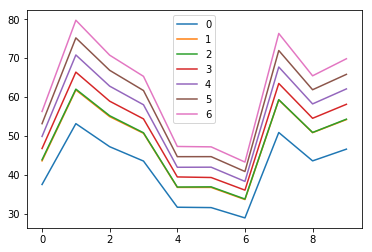

In [35]:
# Lets look at the average sales of stores per day

df_of_day_sales = pd.DataFrame()

for i in range(0,7):
    list_of_sales = []
    day_df = train_df[train_df['day_of_week']==i]
    for j in range(1,11):
        store_sales = day_df[day_df['store']==j]['sales'].tolist()
        list_of_sales.append(sum(store_sales)/len(store_sales))
    df_of_day_sales[i] = list_of_sales
    
df_of_day_sales.plot(kind='line')

In [36]:
# Lets add the avg sales for the for the store for the day 

dict_of_day_sales = {}

for i in range(0,7):
    list_of_sales = []
    store_df = train_df[train_df['day_of_week']==i]
    for j in range(1,11):
        store_sales = store_df[store_df['store']==j]['sales'].tolist()
        dict_of_day_sales[(i,j)]=(sum(store_sales)/len(store_sales))
    
days = train_df['day_of_week'].tolist()
stores = train_df['store'].tolist()

day_sales = []

for i in range(0,len(days)):
    day_sales.append(dict_of_day_sales[(days[i],stores[i])])
    
train_df['avg sales of days per store'] = day_sales

train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636,53.129042


In [37]:
#Lets add this feature for our test set

stores = test_df['store'].tolist()
days = test_df['day_of_week'].tolist()

avg_sales = []

for i in range(0,len(days)):
    avg_sales.append(dict_of_day_sales[(days[i],stores[i])])
    
test_df['avg sales of days per store'] = avg_sales

test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379


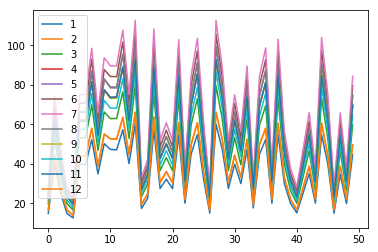

In [38]:
# Lets look at the average sales of each item per month

df_of_month_sales = pd.DataFrame()

for i in range(1,13):
    list_of_sales = []
    day_df = train_df[train_df['month']==i]
    for j in range(1,51):
        item_sales = day_df[day_df['item']==j]['sales'].tolist()
        list_of_sales.append(sum(item_sales)/len(item_sales))
    df_of_month_sales[i] = list_of_sales
    
df_of_month_sales.plot(kind='line')

In [39]:
# Lets add this feature to our train and test sets

dict_of_monthly_sales = {}

for i in range(1,13):
    list_of_sales = []
    month_df = train_df[train_df['month']==i]
    for j in range(1,51):
        item_sales = month_df[month_df['item']==j]['sales'].tolist()
        dict_of_monthly_sales[(i,j)]=(sum(item_sales)/len(item_sales))
    
months = train_df['month'].tolist()
items = train_df['item'].tolist()

month_sales = []

for i in range(0,len(months)):
    month_sales.append(dict_of_monthly_sales[(months[i],items[i])])
    
train_df['avg sales of items per month'] = month_sales

train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636,53.129042,14.830323


In [40]:
#Now lets add this feature to our test set as well 

months = test_df['month'].tolist()
items = test_df['item'].tolist()

sales = []

for i in range(0,len(months)):
    sales.append(dict_of_monthly_sales[(months[i],items[i])])
    
test_df['avg sales of items per month'] = sales

test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615,14.830323
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323


In [41]:
# Now lets add the feature avg sales of items per day

dict_of_daily_sales = {}

for i in range(0,7):
    list_of_sales = []
    day_df = train_df[train_df['day_of_week']==i]
    for j in range(1,51):
        item_sales = day_df[day_df['item']==j]['sales'].tolist()
        dict_of_daily_sales[(i,j)]=(sum(item_sales)/len(item_sales))
    
days = train_df['day_of_week'].tolist()
items = train_df['item'].tolist()

sales = []

for i in range(0,len(days)):
    sales.append(dict_of_daily_sales[(days[i],items[i])])
    
train_df['avg sales of items per day'] = sales

train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636,53.129042,14.830323,24.730268


In [42]:
#Lets add this feature to our test set

days = test_df['day_of_week'].tolist()
items = test_df['item'].tolist()

sales = []

for i in range(0,len(days)):
    sales.append(dict_of_daily_sales[(days[i],items[i])])
    
test_df['avg sales of items per day'] = sales

test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615,14.830323,17.462308
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594


In [43]:
#Lets add the feature average sales of item in store per month

month_store_item = {}

for i in range(1,13):
    month_df = train_df[train_df['month'] == i]
    for j in range(1,11):
        store_df = month_df[month_df['store']==j]
        for z in range(1,51):
            item_sales = store_df[store_df['item'] == z]['sales'].tolist()
            month_store_item[(i,j,z)] = (sum(item_sales)/len(item_sales))
            
months = train_df['month'].tolist()
stores = train_df['store'].tolist()
items = train_df['item'].tolist()

sales = []

for i in range(0,len(months)):
    sales.append(month_store_item[(months[i],stores[i],items[i])])
    
train_df['sales of item in store for month'] = sales

train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636,53.129042,14.830323,24.730268,13.709677


In [44]:
#Now lets add the feature to our test dataset

months = test_df['month'].tolist()
stores = test_df['store'].tolist()
items = test_df['item'].tolist()

sales = []

for i in range(0,len(months)):
    sales.append(month_store_item[(months[i],stores[i],items[i])])
    
test_df['sales of item in store for month'] = sales
test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615,14.830323,17.462308,13.709677
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677


In [45]:
#Now lets add the feature avg sales of items in store for day of the week
day_store_item = {}

for i in range(0,7):
    day_df = train_df[train_df['day_of_week'] == i]
    for j in range(1,11):
        store_df = day_df[day_df['store']==j]
        for z in range(1,51):
            item_sales = store_df[store_df['item'] == z]['sales'].tolist()
            day_store_item[(i,j,z)] = (sum(item_sales)/len(item_sales))
            
days = train_df['day_of_week'].tolist()
stores = train_df['store'].tolist()
items = train_df['item'].tolist()

sales = []

for i in range(0,len(days)):
    sales.append(day_store_item[(days[i],stores[i],items[i])])
    
train_df['sales of item in store for day'] = sales

train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636,53.129042,14.830323,24.730268,13.709677,22.973180


In [46]:
#Now lets add this feature to our test set 

days = test_df['day_of_week'].tolist()
stores = test_df['store'].tolist()
items = test_df['item'].tolist()

sales = []

for i in range(0,len(days)):
    sales.append(day_store_item[(days[i],stores[i],items[i])])
    
test_df['sales of item in store for day'] = sales

test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615,14.830323,17.462308,13.709677,15.584615
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326


In [47]:
#Now lets add average sales for each item in each store for each day for each month

month_day_store_item = {}

for i in range(1,13):
    month_df = train_df[train_df['month']==i]
    for j in range(0,7):
        day_df = month_df[month_df['day_of_week']==j]
        for z in range(1,11):
            store_df = day_df[day_df['store'] == z]
            for x in range(1,51):
                item_sales = store_df[store_df['item'] == x]['sales'].tolist()
                month_day_store_item[(i,j,z,x)] = (sum(item_sales)/len(item_sales))
                
months = train_df['month'].tolist()
days = train_df['day_of_week'].tolist()
stores = train_df['store'].tolist()
items = train_df['item'].tolist()

sales = []

for i in range(0,len(months)):
    sales.append(month_day_store_item[(months[i],days[i],stores[i],items[i])])
    
train_df['month day store item'] = sales

train_df.head()

,date,store,item,sales,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day,month day store item
0,2013-01-01,1,1,13,2013,1,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582,11.545455
1,2013-01-02,1,1,11,2013,2,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103,12.590909
2,2013-01-03,1,1,14,2013,3,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107,13.391304
3,2013-01-04,1,1,13,2013,4,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326,14.695652
4,2013-01-05,1,1,10,2013,5,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636,53.129042,14.830323,24.730268,13.709677,22.973180,15.500000


In [48]:
#Now lets add this feature to our test dataset

months = test_df['month'].tolist()
days = test_df['day_of_week'].tolist()
stores = test_df['store'].tolist()
items = test_df['item'].tolist()

sales = []

for i in range(0,len(months)):
    sales.append(month_day_store_item[(months[i],days[i],stores[i],items[i])])
    
test_df['month day store item'] = sales

test_df.head()

,id,date,store,item,year,day_of_week,week_of_year,month,date in month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day,month day store item
0,0,2018-01-01,1,1,2018,0,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615,14.830323,17.462308,13.709677,15.584615,11.190476
1,1,2018-01-02,1,1,2018,1,1,1,2,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582,11.545455
2,2,2018-01-03,1,1,2018,2,1,1,3,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103,12.590909
3,3,2018-01-04,1,1,2018,3,1,1,4,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107,13.391304
4,4,2018-01-05,1,1,2018,4,1,1,5,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326,14.695652


In [49]:
# #Lets add date block num

# block = 1
# blocks = []

# for i in range(2013,2018):
#     year_df = train_df[train_df['year']==i]
#     for j in range(1,13):
#         month_df = year_df[year_df['month']==j]
#         for z in range(0,len(month_df)):
#             blocks.append(block)
#         block = block + 1
        
# train_df['date block num'] = blocks

# train_df.head()

In [50]:
# #Lets add date block num to our test dataset

# block = 61
# blocks = []

# for i in range(1,4):
#     month_df = test_df[test_df['month']==i]
#     for j in range(0,len(month_df)):
#         blocks.append(block)
#     block = block + 1
    
# test_df['date block num'] = blocks

# test_df.head()

In [51]:
train_df = train_df.drop(['date','date in month'], axis=1)
train_df.head()

,store,item,sales,year,day_of_week,week_of_year,month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day,month day store item
0,1,1,13,2013,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582,11.545455
1,1,1,11,2013,2,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103,12.590909
2,1,1,14,2013,3,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107,13.391304
3,1,1,13,2013,4,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326,14.695652
4,1,1,10,2013,5,1,1,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636,53.129042,14.830323,24.730268,13.709677,22.973180,15.500000


In [52]:
test_df = test_df.drop(['date','date in month'], axis=1)
test_df.head()

,id,store,item,year,day_of_week,week_of_year,month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day,month day store item
0,0,1,1,2018,0,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615,14.830323,17.462308,13.709677,15.584615,11.190476
1,1,1,1,2018,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582,11.545455
2,2,1,1,2018,2,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103,12.590909
3,3,1,1,2018,3,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107,13.391304
4,4,1,1,2018,4,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326,14.695652


In [53]:
test_df = test_df.drop(['id'], axis=1)
test_df.head()

,store,item,year,day_of_week,week_of_year,month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day,month day store item
0,1,1,2018,0,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615,14.830323,17.462308,13.709677,15.584615,11.190476
1,1,1,2018,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582,11.545455
2,1,1,2018,2,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103,12.590909
3,1,1,2018,3,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107,13.391304
4,1,1,2018,4,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326,14.695652


In [54]:
train_y = train_df['sales']
train_df = train_df.drop(['sales'], axis=1)
train_y.head()

0    13
1    11
2    14
3    13
4    10
Name: sales, dtype: int64

In [55]:
train_df.head()

,store,item,year,day_of_week,week_of_year,month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day,month day store item
0,1,1,2013,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582,11.545455
1,1,1,2013,2,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103,12.590909
2,1,1,2013,3,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107,13.391304
3,1,1,2013,4,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326,14.695652
4,1,1,2013,5,1,1,47.268379,19.971522,21.981599,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35.524503,58.662697,35.855588,32.174452,0,0,5,39.870636,53.129042,14.830323,24.730268,13.709677,22.973180,15.500000


In [56]:
test_df.head()

,store,item,year,day_of_week,week_of_year,month,avg_sales_at_store,avg_sales_of_item_at_store,avg_sales_of_item,is month 5,is month 6,is month 7,is month 8,is weekend,largest,second,third,fourth,fifth,sixth,seventh,eighth,ninth,tenth,avg month sales,avg weekday sales,avg week of year sales,avg sales of stores per month,is store 2,is store 7,day and month,avg sales of days per month,avg sales of days per store,avg sales of items per month,avg sales of items per day,sales of item in store for month,sales of item in store for day,month day store item
0,1,1,2018,0,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,41.429638,35.855588,32.174452,0,0,7,28.300000,37.471615,14.830323,17.462308,13.709677,15.584615,11.190476
1,1,1,2018,1,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.225908,35.855588,32.174452,0,0,1,32.764727,43.559923,14.830323,20.279693,13.709677,18.168582,11.545455
2,1,1,2018,2,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,48.368506,35.855588,32.174452,0,0,2,32.502727,43.838621,14.830323,20.414176,13.709677,18.793103,12.590909
3,1,1,2018,3,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,51.723218,35.855588,32.174452,0,0,3,34.784957,46.731188,14.830323,21.687356,13.709677,19.452107,13.391304
4,1,1,2018,4,1,1,47.268379,19.971522,21.981599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.524503,55.157249,35.855588,32.174452,0,0,4,37.519565,49.841379,14.830323,23.245594,13.709677,21.015326,14.695652


In [57]:
#lets do the train test split on our data
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, train_y, test_size=0.2)

In [58]:
import xgboost as xgb
from xgboost import XGBRegressor

mdl = XGBRegressor()
mdl.fit(train_df,train_y)
#bst = xgboost(data = X_train,label = y_train, nround = 2, objective = 'reg:linear',eval_metric = "auc")

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import explained_variance_score

# preds = mdl.predict(X_test)
# print(explained_variance_score(preds,y_test))

In [60]:
predictions = mdl.predict(test_df).tolist()

In [ ]:
ids = []
for i in range(0,len(test_df)):
    ids.append(i)

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission['id'] = ids

In [ ]:
submission['sales'] = predictions

In [ ]:
submission.to_csv('sub.csv',index=False)